In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

In [5]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [6]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and I won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

In [7]:
result = pd.merge(strava, cheetah, how='inner', left_on = 'date', right_index = True)
result.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
date,,,,,,,,,,,,,,,,,,,,,
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


In [8]:
result = result[result.device_watts!=False]
result.shape

(209, 372)

Graphs of variables:

C:\Users\Brian Choi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Brian Choi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


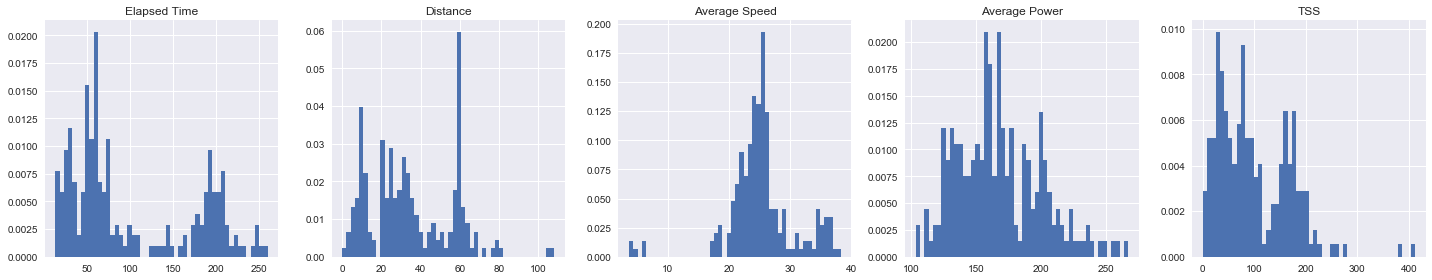

In [9]:
fig, axes = plt.subplots(1,5, figsize=(20,4))
ax0, ax1, ax2, ax3, ax4 = axes.flatten()
ax0.hist(result['elapsed_time'], density = True, histtype = 'bar', bins = 50)
ax0.set_title('Elapsed Time')
ax1.hist(result['distance'], density = True, histtype = 'bar', bins = 50)
ax1.set_title('Distance')
ax2.hist(result['Average Speed'], density = True, histtype = 'bar', bins = 50)
ax2.set_title('Average Speed')
ax3.hist(result['average_watts'], density = True, histtype = 'bar', bins = 50)
ax3.set_title('Average Power')
ax4.hist(result['TSS'], density = True, histtype = 'bar', bins = 50)
ax4.set_title('TSS')
fig.tight_layout()

Skewness of variables:

In [11]:
def skewness(x):
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m) * (i-m) * (i-m)
    res /= ( len(x) * s * s * s)
    return res

print("Skewness of time: " , skewness(result['elapsed_time']))
print("Skewness of distance: " , skewness(result['distance']))
print("Skewness of average speed: ", skewness(result['Average Speed']))
print("Skewness of average power: " , skewness(result['average_watts']))
print("Skewness of TSS: " , skewness(result['TSS']))

The skewness of time is 0.63069381841196
The skewness of distance is 0.5124316095249656
Skewness of average speed:  -0.559270091530111
The skewness of average power is nan
The skewness of TSS is 1.0406742960001307


None of these variables are exactly normally distributed and have some skewness as it can be seen in the graphs above. 

In [49]:
result_correlation = result[['distance', 'moving_time', 'Average Speed', 'average_heartrate', 'average_watts', 'NP', 
                             'TSS', 'Elevation Gain']]
result_correlation.corr()

,distance,moving_time,Average Speed,average_heartrate,average_watts,NP,TSS,Elevation Gain
distance,1.000000,0.939383,0.187363,0.114595,0.031858,0.270703,0.922565,0.805468
moving_time,0.939383,1.000000,-0.103484,-0.048611,-0.112507,0.044431,0.871368,0.813146
Average Speed,0.187363,-0.103484,1.000000,0.742388,0.720608,0.674857,0.134054,-0.016160
average_heartrate,0.114595,-0.048611,0.742388,1.000000,0.672457,0.593091,0.113775,0.071553
average_watts,0.031858,-0.112507,0.720608,0.672457,1.000000,0.772574,0.150163,-0.100030
NP,0.270703,0.044431,0.674857,0.593091,0.772574,1.000000,0.432286,0.229933
TSS,0.922565,0.871368,0.134054,0.113775,0.150163,0.432286,1.000000,0.828928
Elevation Gain,0.805468,0.813146,-0.016160,0.071553,-0.100030,0.229933,0.828928,1.000000


Correlated variables are:
Distance and elevation gain, 
moving time and elevation gain, 
tss and elevation gain, 
distance and TSS, 
moving time and TSS, 
average speed and average heart rate, 
average speed and average watts, 
average speed and NP, 
average watts and NP, 
average watts and average heart rate

## Training Stress Score (TSS) Variable

Text(0.5, 1.0, 'TSS and Elevation Gain')

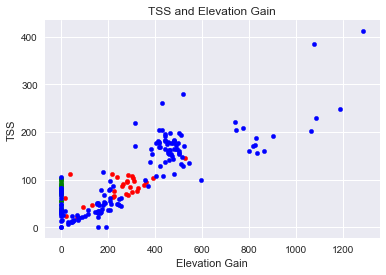

In [27]:
ax1 = result_race.plot(kind='scatter', x='Elevation Gain', y='TSS', color='r')    
ax2 = result_workout.plot(kind='scatter', x='Elevation Gain', y='TSS', color='g', ax=ax1)    
ax3 = result_ride.plot(kind='scatter', x='Elevation Gain', y='TSS', color='b', ax=ax1)
ax1.set_title('TSS and Elevation Gain')

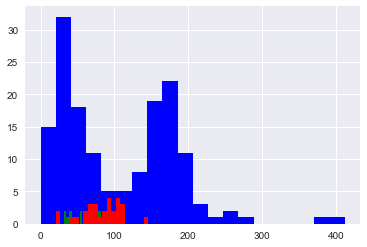

In [28]:
newdf1 = result[result.workout_type == 'Ride']
newdf1_TSS = newdf1['TSS']
newdf1_TSS.hist(normed = 0, histtype = "stepfilled", bins = 20, color ='b')

newdf2 = result[result.workout_type == 'Workout']
newdf2_TSS = newdf2['TSS']
newdf2_TSS.hist(normed = 0, histtype = "stepfilled", bins = 20, color='g')

newdf3 = result[result.workout_type=='Race']
newdf3_TSS = newdf3['TSS']
newdf3_TSS.hist(normed = 0, histtype = "stepfilled", bins = 20, color='r')

The histogram and the scatter plot above illustrates the intensity of the workout of ride as opposed to the other workouts. Furthermore, there are higher data entries for rides than the other workouts implying the high popularity of the workout itself.